<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

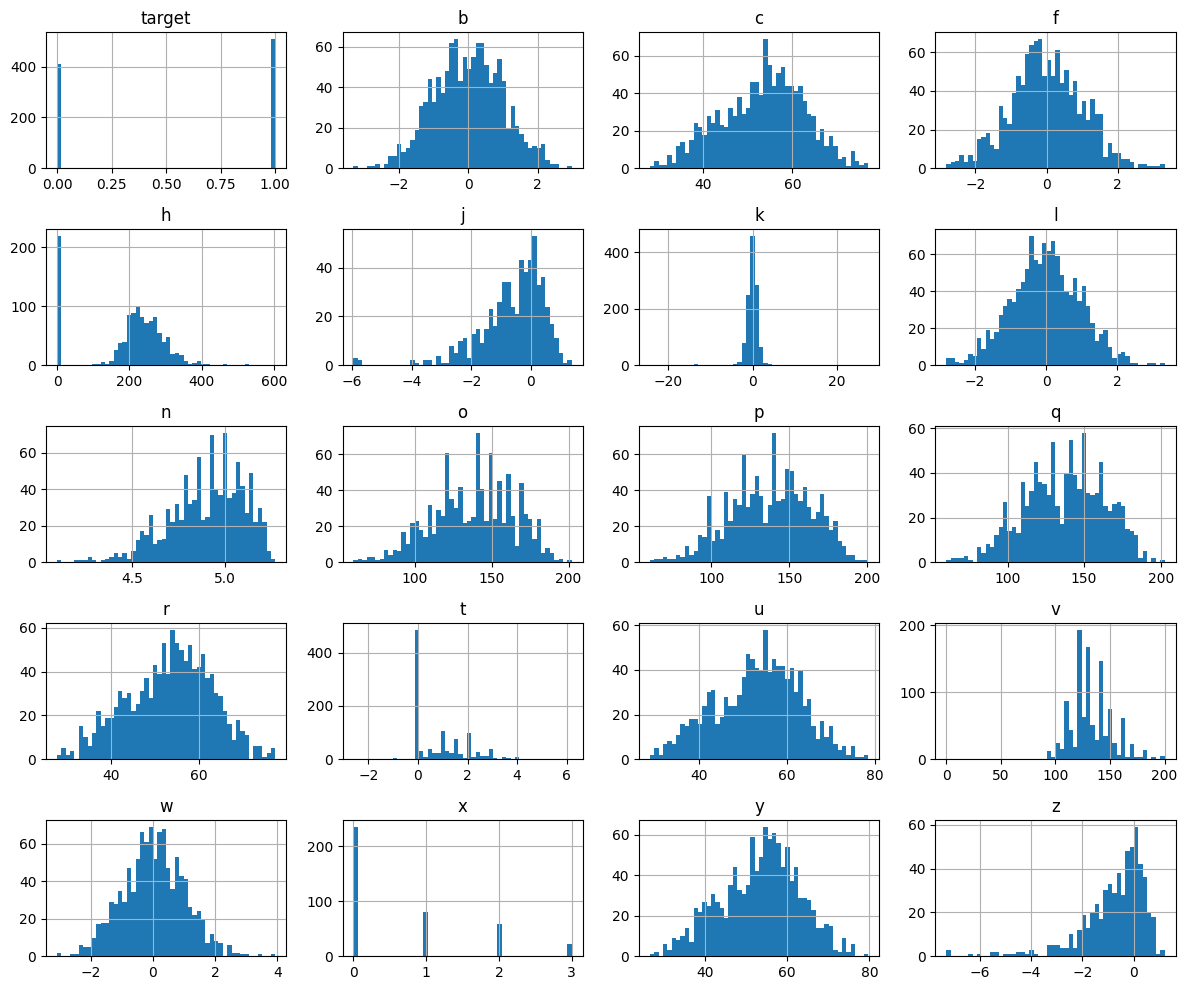

Missing values handled successfully.
target    276
a           3
b           0
c           0
d         635
e           0
f           0
g           0
h          38
i         109
j         605
k           0
l           0
m         418
n         184
o         188
p          74
q         187
r           0
s           0
t          86
u         117
v          80
w         117
x         799
y           0
z         598
{          74
dtype: int64

Duplicates removed. New shape: (1196, 28)

Data normalized. First 5 rows:
   target               a         b         c                  d          e  \
0     0.0  lv hypertrophy  0.610389  0.714286       fixed defect  Cleveland   
1     1.0  lv hypertrophy  0.358036  0.795918             normal  Cleveland   
2     1.0  lv hypertrophy  0.595613  0.795918  reversable defect  Cleveland   
3     0.0          normal  0.301262  0.183673             normal  Cleveland   
4     0.0  lv hypertrophy  0.311787  0.265306             normal  Cleveland   

        

In [ ]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

# 2. Examine the Dataset: Investigate the dataset before cleaning to find NA values, duplicates, etc.
messy_data.head()
messy_data.info()
messy_data.describe()
# messy_data.tail()
messy_data.shape #dimensions
# messy_data.columns
messy_data.dtypes


# # 3. Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
messy_data.hist(figsize=(12, 10), bins=50)
plt.tight_layout()
plt.show()

# # 4. Preprocess the data
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
print("Missing values handled successfully.")
print(clean_data.isnull().sum())  # Result should be zero for numerical columns

clean_data = dp.remove_duplicates(clean_data)
print(f"\nDuplicates removed. New shape: {clean_data.shape}")   

clean_data = dp.normalize_data(clean_data, method='minmax')
print(f"\nData normalized. First 5 rows:\n{clean_data.head()}")

clean_data = dp.remove_redundant_features(clean_data, threshold=0.9)
print(f"\nRedundant features removed. Remaining columns: {clean_data.columns}")



# 5. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

# 6. Train and evaluate the model
print("\nTraining simple logistic regression model for target classification: ")
# dp.simple_model(clean_data) # original led to error. 'dp' must be added in front.
dp.simple_model(clean_data, split_data=True, scale_data=True, print_report=True)